# Zadanie 04: Analiza Głównych Składowych (PCA)
### Maciej Kos sem 2 CB 

## Wprowadzenie

Analiza głównych składowych (PCA - Principal Component Analysis) to jedno z głównych zastosowań rozkładu na wartości osobliwe (SVD), zapewniające statystyczną interpretację hierarchicznego układu współrzędnych opartego na danych, używanego do reprezentacji skorelowanych danych wielowymiarowych.

PCA wstępnie przetwarza dane poprzez odjęcie średniej i ustawienie wariancji na jedynkę przed wykonaniem SVD. Geometria powstałego układu współrzędnych jest określona przez główne składowe (PC), które są ze sobą nieskorelowane (ortogonalne), ale mają maksymalną korelację z pomiarami.

## Zadanie

Oblicz:
1. Środek danych (średnią wartość)
2. Osie główne (główne składowe)
3. Kąt obrotu danych dwuwymiarowych
4. Wizualizację wyników 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Wczytanie danych z pliku CSV
data = np.genfromtxt('3.csv', delimiter=',')

# Jeśli dane są w jednej linii, trzeba je spłaszczyć
if data.ndim == 1:
    data = data.reshape(2, -1)
elif data.shape[0] > data.shape[1]:
    # Jeśli jest więcej wierszy niż kolumn, trzeba dane przetransponować
    data = data.T

print(f"Kształt danych: {data.shape}")
print(f"Liczba obserwacji: {data.shape[1]}")
print(f"Liczba wymiarów: {data.shape[0]}")

print(f"\nPierwsze 5 punktów danych:\n{data[:, :5]}")

Kształt danych: (2, 10000)
Liczba obserwacji: 10000
Liczba wymiarów: 2

Pierwsze 5 punktów danych:
[[-0.19003622 -0.66255861  0.97194328  2.71057706 -0.0930845 ]
 [ 1.48586596  0.55445054 -0.0424829   0.3661896   0.55348508]]


In [2]:
# Krok 1: Obliczenie średniej (środka danych)
X_mean = np.mean(data, axis=1)
print(f"Średnia (środek danych):\n  x_center = {X_mean[0]:.6f}\n  y_center = {X_mean[1]:.6f}")

# Krok 2: Odjęcie średniej z danych
B = data - np.tile(X_mean, (data.shape[1], 1)).T

print(f"\nKształt danych po odjęciu średniej: {B.shape}")

Średnia (środek danych):
  x_center = 0.997702
  y_center = 1.006177

Kształt danych po odjęciu średniej: (2, 10000)


In [3]:
# Krok 3: Rozkład SVD (znalezienie głównych składowych)
n_points = data.shape[1]
U, S, VT = np.linalg.svd(B / np.sqrt(n_points - 1), full_matrices=False)

print("Rozkład SVD:")
print(f" U (wektory osobliwe - główne składowe):\n{U}")
print(f"\n S (wartości osobliwe):\n{S}")
print(f"\n Wariancja wyjaśniana każdą składową:")
print(f"   λ₁ = {S[0]**2:.6f}")
print(f"   λ₂ = {S[1]**2:.6f}")

# Wariancja całkowita
total_variance = np.sum(S**2)
print(f"\n Całkowita wariancja: {total_variance:.6f}")
print(f" Procent wariancji wyjaśnianej:")
print(f"   PC1: {(S[0]**2 / total_variance * 100):.2f}%")
print(f"   PC2: {(S[1]**2 / total_variance * 100):.2f}%")

Rozkład SVD:
 U (wektory osobliwe - główne składowe):
[[-0.90662638  0.42193436]
 [ 0.42193436  0.90662638]]

 S (wartości osobliwe):
[0.99616189 0.98563892]

 Wariancja wyjaśniana każdą składową:
   λ₁ = 0.992339
   λ₂ = 0.971484

 Całkowita wariancja: 1.963823
 Procent wariancji wyjaśnianej:
   PC1: 50.53%
   PC2: 49.47%


In [4]:
# Krok 4: Obliczenie kąta obrotu
# Główna składowa 1 (PC1) to U[:, 0]
PC1 = U[:, 0]
theta_rad = np.arctan2(PC1[1], PC1[0])  
theta_deg = np.degrees(theta_rad)

print(f"Kąt obrotu głównych składowych:")
print(f"  θ (radiany): {theta_rad:.6f}")
print(f"  θ (stopnie): {theta_deg:.2f}°")

print(f"\nGłówne składowe:")
print(f"  PC1 (kierunek największej wariancji): {PC1}")
print(f"  PC2 (kierunek najmniejszej wariancji): {U[:, 1]}")

# Długości osi głównych (odchylenia standardowe)
axis_length_1 = S[0]
axis_length_2 = S[1]
print(f"\nDługości osi głównych:")
print(f"  Oś 1: {axis_length_1:.6f}")
print(f"  Oś 2: {axis_length_2:.6f}")
print(f"  Stosunek: {axis_length_1 / axis_length_2:.2f}")

Kąt obrotu głównych składowych:
  θ (radiany): 2.706015
  θ (stopnie): 155.04°

Główne składowe:
  PC1 (kierunek największej wariancji): [-0.90662638  0.42193436]
  PC2 (kierunek najmniejszej wariancji): [0.42193436 0.90662638]

Długości osi głównych:
  Oś 1: 0.996162
  Oś 2: 0.985639
  Stosunek: 1.01


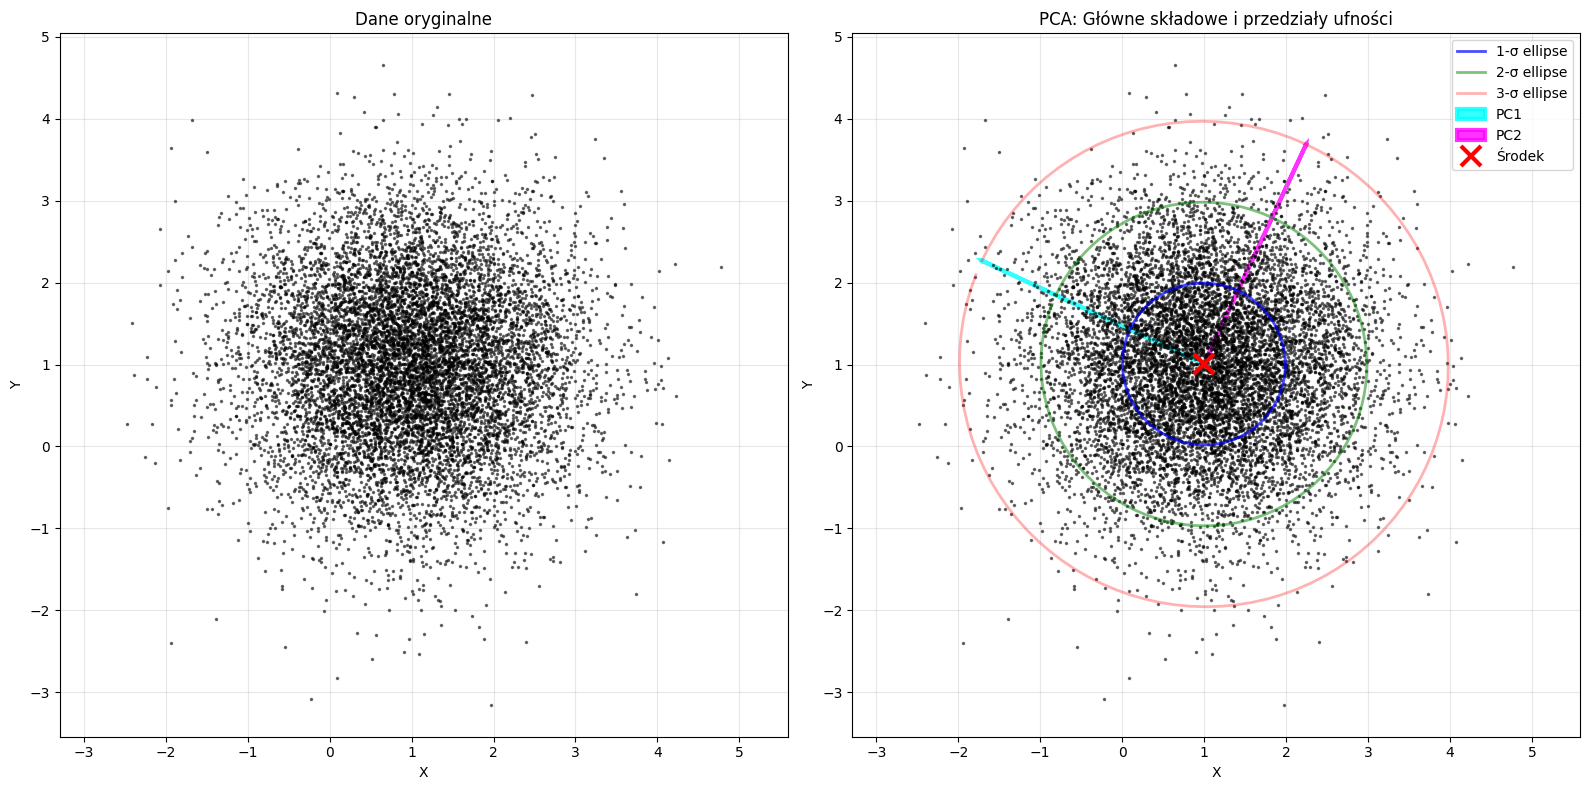

In [5]:
# Krok 5: Wizualizacja wyników
plt.rcParams['figure.figsize'] = [16, 8]

fig = plt.figure()

# Podwykres 1: Dane oryginalne
ax1 = fig.add_subplot(121)
ax1.plot(data[0, :], data[1, :], '.', color='k', markersize=3, alpha=0.5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Dane oryginalne')
ax1.grid(True, alpha=0.3)
ax1.axis('equal')

# Podwykres 2: Dane z głównymi składowymi
ax2 = fig.add_subplot(122)
ax2.plot(data[0, :], data[1, :], '.', color='k', markersize=3, alpha=0.5)

# Elipsy przedziału ufności
theta = 2 * np.pi * np.arange(0, 1, 0.01)

# Elipsy dla 1-sigma, 2-sigma, 3-sigma
for sigma, color, alpha, linewidth in [(1, 'blue', 0.7, 2),
                                         (2, 'green', 0.5, 2),
                                         (3, 'red', 0.3, 2)]:
    ellipse = U @ np.diag(S * sigma) @ np.array([np.cos(theta), np.sin(theta)])
    ax2.plot(X_mean[0] + ellipse[0, :], X_mean[1] + ellipse[1, :], 
             '-', color=color, linewidth=linewidth, alpha=alpha,
             label=f'{sigma}-σ ellipse')

# Główne składowe jako strzałki
scale = 3
arrow_props = dict(head_width=0.3, head_length=0.2, fc='cyan', ec='cyan')
ax2.arrow(X_mean[0], X_mean[1], 
          U[0, 0] * S[0] * scale, U[1, 0] * S[0] * scale,
          color='cyan', linewidth=3, label='PC1', alpha=0.8)
ax2.arrow(X_mean[0], X_mean[1], 
          U[0, 1] * S[1] * scale, U[1, 1] * S[1] * scale,
          color='magenta', linewidth=3, label='PC2', alpha=0.8)

# Zaznaczenie środka
ax2.plot(X_mean[0], X_mean[1], 'rx', markersize=15, markeredgewidth=3, label='Środek')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('PCA: Główne składowe i przedziały ufności')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')
ax2.axis('equal')

plt.tight_layout()
plt.show()

In [6]:
print("PODSUMOWANIE WYNIKÓW PCA")
print(f"\n1. ŚRODEK DANYCH (ŚREDNIA):")
print(f"   x_center = {X_mean[0]:.8f}")
print(f"   y_center = {X_mean[1]:.8f}")

print(f"\n2. GŁÓWNE SKŁADOWE (GŁÓWNE KIERUNKI):")
print(f"   PC1 = [{U[0, 0]:.8f}, {U[1, 0]:.8f}]")
print(f"   PC2 = [{U[0, 1]:.8f}, {U[1, 1]:.8f}]")

print(f"\n3. KĄT OBROTU:")
print(f"   θ = {theta_rad:.8f} rad = {theta_deg:.4f}°")

print(f"\n4. DŁUGOŚCI OSI GŁÓWNYCH (ODCHYLENIA STANDARDOWE):")
print(f"   σ₁ = {axis_length_1:.8f}")
print(f"   σ₂ = {axis_length_2:.8f}")

print(f"\n5. WARIANCJA:")
print(f"   λ₁ = {S[0]**2:.8f} ({(S[0]**2 / total_variance * 100):.2f}%)")
print(f"   λ₂ = {S[1]**2:.8f} ({(S[1]**2 / total_variance * 100):.2f}%)")
print(f"   Całkowita: {total_variance:.8f}")

print(f"\n6. KORELACJA MIĘDZY ZMIENNYMI:")
corr_matrix = np.corrcoef(data)
print(f"   r(X,Y) = {corr_matrix[0, 1]:.8f}")
print("="*60)

PODSUMOWANIE WYNIKÓW PCA

1. ŚRODEK DANYCH (ŚREDNIA):
   x_center = 0.99770222
   y_center = 1.00617702

2. GŁÓWNE SKŁADOWE (GŁÓWNE KIERUNKI):
   PC1 = [-0.90662638, 0.42193436]
   PC2 = [0.42193436, 0.90662638]

3. KĄT OBROTU:
   θ = 2.70601481 rad = 155.0432°

4. DŁUGOŚCI OSI GŁÓWNYCH (ODCHYLENIA STANDARDOWE):
   σ₁ = 0.99616189
   σ₂ = 0.98563892

5. WARIANCJA:
   λ₁ = 0.99233851 (50.53%)
   λ₂ = 0.97148408 (49.47%)
   Całkowita: 1.96382259

6. KORELACJA MIĘDZY ZMIENNYMI:
   r(X,Y) = -0.00812474
